In [1]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
import pandas as pd

import chardet
rawdata = open('/content/US-Economic-News.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

df = pd.read_csv(rf"/content/US-Economic-News.csv", encoding=charenc)
print(df.head())

MacRoman
    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  842613455    False   finalized                   3     12/5/15 17:48   
1  842613456    False   finalized                   3     12/5/15 16:54   
2  842613457    False   finalized                   3      12/5/15 1:59   
3  842613458    False   finalized                   3      12/5/15 2:19   
4  842613459    False   finalized                   3     12/5/15 17:48   

   positivity  positivity:confidence relevance  relevance:confidence  \
0         3.0                 0.6400       yes                 0.640   
1         NaN                    NaN        no                 1.000   
2         NaN                    NaN        no                 1.000   
3         NaN                 0.0000        no                 0.675   
4         3.0                 0.3257       yes                 0.640   

       articleid      date                                           headline  \
0  wsj_398217788   8/14/91

In [ ]:
df = df[['text', 'relevance']]
print(df.loc[0]['text'])
### Clean each article/text. We got 'City name', '</br>' clause, '--' , 'numbers'
### 'company name'

NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday's auction plummeted more than a fifth of a percentage poin

In [ ]:
#Cleaning the target variable column:::
print(df['relevance'].value_counts())

df = df[df['relevance'] != 'not sure']
print(df['relevance'].value_counts())

print(df['relevance'].value_counts()/df.shape[0])

#This s

relevance
no          6571
yes         1420
not sure       9
Name: count, dtype: int64
relevance
no     6571
yes    1420
Name: count, dtype: int64
relevance
no     0.8223
yes    0.1777
Name: count, dtype: float64


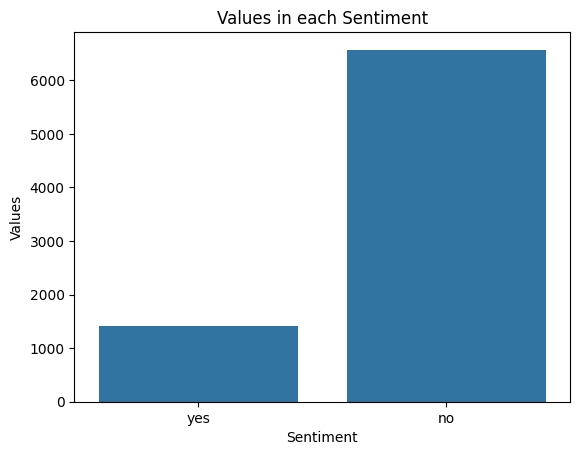

In [ ]:
df_yes = df[df['relevance'] == 'yes']
df_no = df[df['relevance'] == 'no']

df['relevance'].value_counts().index
df['relevance'].value_counts().tolist()

fig = go.Figure([go.Bar(x=df['relevance'].value_counts().index, y=df['relevance'].value_counts().tolist())])
fig.update_layout(
    title="Values in each Sentiment",
    xaxis_title="Sentiment",
    yaxis_title="Values")
fig.show()


sns.countplot(data=df, x='relevance')
plt.title('Values in each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Values')
plt.show()

In [ ]:
df_pos = df[df['relevance'] == 'yes']
df_neg = df[df['relevance'] == 'no']
print(df_pos.shape,df_neg.shape)
df_pos_sampled = df_pos[:500]
df_neg_sampled = df_neg[:500]
print(df_pos_sampled.shape,df_neg_sampled.shape)

df_pos_sampled = df_pos_sampled[['text','relevance']]
df_neg_sampled = df_neg_sampled[['text','relevance']]
print(df_pos_sampled.shape,df_neg_sampled.shape)
print(df_pos_sampled["relevance"].value_counts(),df_neg_sampled["relevance"].value_counts())

(1420, 2) (6571, 2)
(500, 2) (500, 2)
(500, 2) (500, 2)
relevance
yes    500
Name: count, dtype: int64 relevance
no    500
Name: count, dtype: int64


In [ ]:
df['relevance'] = df['relevance'].map({'yes' : 1, 'no' : 0})
df['relevance'].value_counts()

relevance
0    6571
1    1420
Name: count, dtype: int64

In [ ]:
print(df.shape)
df = df[:500]
print(df.shape)

(7991, 2)
(500, 2)


In [ ]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer , ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')
stopwords = ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def preprocessing(text):
  doc = nlp(text)
  ents_removed_doc = []
  for sentence in doc:
    if sentence.text not in doc.ents:
      ents_removed_doc.append(sentence.text)

  doc = " ".join(ents_removed_doc)
  doc = doc.lower().strip()
  doc = doc.replace('-', ' ')
  doc = doc.replace('</br>', ' ')
  doc = "".join([x for x in doc if x not in string.punctuation and not x.isdigit()])
  doc = " ".join([x for x in doc.split() if x not in stopwords])

  return doc



[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['text'] = df['text'].apply(preprocessing)
print(df.head())

                                                text  relevance
0  new york yields certificates deposit offered m...          1
1  wall street journal online br morning brief lo...          0
2  washington effort achieve banking reform senat...          0
3  statistics enormous costs employee drug abuse ...          0
4  new york indecision marked dollar s tone trade...          1


In [ ]:
final_text = list(df['text'])
print(final_text)
vectorizer = TfidfVectorizer(use_idf=True, max_features=5000)
vecotrized_docs = vectorizer.fit_transform(final_text)
vecotrized_docs = vecotrized_docs.toarray()
x = vecotrized_docs
y = df['relevance']
print(x.shape)
print(y.shape)

['new york yields certificates deposit offered major banks dropped tenth percentage point latest week reflecting overall decline short term rates br small denomination consumer cds sold directly banks average yield month deposits fell week ended yesterday according bank survey banxquote money markets wilmington del information service br month consumer deposits average yield sank week according banxquote banks banxquote survey citibank new york corestates pennsylvania paying threemonth small denomination cds br declines somewhat smaller year consumer cds eased banxquote said br yields month month treasury bills sold monday s auction plummeted fifth percentage point previous week respectively', 'wall street journal online br morning brief look day s biggest news emailed subscribers business day sign e mail br friday evening congress town summer recess americans heading mid august weekend bush administration sent message states federal government make tougher national children s insuranc

In [ ]:
df_pos_sampled['text'] = df_pos_sampled['text'].apply(preprocessing)
df_neg_sampled['text'] = df_neg_sampled['text'].apply(preprocessing)

In [ ]:
df_sampled = pd.concat([df_pos_sampled,df_neg_sampled], ignore_index=True)
x_sampled = vectorizer.transform(df_sampled['text']).toarray()
y_sampled = df_sampled['relevance']


In [ ]:
#Neural network model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

X_train_sampled,X_test_sampled,y_train_sampled,y_test_sampled=train_test_split(x_sampled, y_sampled, test_size=0.2,
                                                                               random_state=43)
print(X_train_sampled.shape, y_train_sampled.shape)
print(X_test_sampled.shape, y_test_sampled.shape)

clf = MLPClassifier(max_iter=200)
clf.fit(X_train_sampled, y_train_sampled)
y_pred_train = clf.predict(X_train_sampled)
y_pred_test = clf.predict(X_test_sampled)

print("\nTraining Accuracy score:",accuracy_score(y_train_sampled, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test_sampled, y_pred_test))

print(classification_report(y_test_sampled, y_pred_test, target_names=['not relevant', 'relevant']))

(800, 5000) (800,)
(200, 5000) (200,)

Training Accuracy score: 1.0
Testing Accuracy score: 0.655
              precision    recall  f1-score   support

not relevant       0.67      0.65      0.66       103
    relevant       0.64      0.66      0.65        97

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200

